把預處理過的每家公司的10-K財報資料製造成一個按詞頻遞減的list，再把這些list放到一個list中

In [35]:
import pickle
dic_freq = []
companies = ['AAPL', 'GOOG', 'MSFT', 'CSCO', 'FB']
for comp in companies:
    with open('pickles/{}/{}_2017.pickle'.format(comp, comp), 'rb') as f:
        dic_freq.append(pickle.load(f))
        dic_freq[-1] = list(map(lambda x: (x[0].upper(), x[1]), dic_freq[-1]))
word_list = []
for dic in dic_freq:
    word_list.append([i[0].upper() for i in dic])
for wl in word_list:
    print(wl[:20])

['THE', 'AND', 'COMPANY', 'THE', 'FOR', 'ANY', 'THAT', 'WITH', 'ARE', 'ITS', 'MAY', 'OTHER', 'PLAN', 'STOCK', 'SUCH', 'NOT', 'SHALL', 'UNDER', 'PARTICIPANT', 'AWARD']
['AND', 'THE', 'OUR', 'FOR', 'ARE', 'THAT', 'FROM', 'REVENUES', 'OTHER', 'GOOGLE', 'DECEMBER', 'THE', 'WITH', 'HAVE', 'INCOME', 'NOT', 'ALPHABET', 'MAY', 'TAX', 'NET']
['AND', 'THE', 'OUR', 'FOR', 'REVENUE', 'ARE', 'THAT', 'WITH', 'BILLION', 'FROM', 'SERVICES', 'THE', 'INCOME', 'OTHER', 'PRODUCTS', 'JUNE', 'YEAR', 'MAY', 'MILLION', 'BUSINESS']
['THE', 'AND', 'COMPANY', 'ANY', 'FOR', 'STOCK', 'THAT', 'WITH', 'UNITS', 'SHALL', 'OUR', 'YOU', 'ARE', 'THIS', 'THE', 'YOUR', 'MAY', 'OTHER', 'PLAN', 'RESTRICTED']
['AND', 'THE', 'OUR', 'THAT', 'FOR', 'ARE', 'MAY', 'OTHER', 'WITH', 'TAX', 'FROM', 'PRODUCTS', 'NOT', 'HAVE', 'FINANCIAL', 'DECEMBER', 'WHICH', 'REVENUE', 'SUCH', 'THE']


In [36]:
with open('keyword_dict.pickle', 'rb') as f:
    keyword_dict = pickle.load(f)
    
i = 0
DOC_COUNT_MAX = 1028262
sentiment_class_label = ['Negative', 'Positive', 'Uncertain', 'Litigious', 'Constraining', 'Superflouous', 'Interesting']
print('sentiment class label: ' + ' '.join(sentiment_class_label))
for word,dic in keyword_dict.items():
    if i == 20:
        break
    print(word)
    print(dic)
    i += 1

sentiment class label: Negative Positive Uncertain Litigious Constraining Superflouous Interesting
ABANDON
{'doc_count': 56605, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABANDONED
{'doc_count': 95651, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABANDONING
{'doc_count': 11846, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABANDONMENT
{'doc_count': 79689, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABANDONMENTS
{'doc_count': 4730, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABANDONS
{'doc_count': 5128, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABDICATED
{'doc_count': 73, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABDICATES
{'doc_count': 1, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABDICATING
{'doc_count': 28, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABDICATION
{'doc_count': 570, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABDICATIONS
{'doc_count': 0, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABERRANT
{'doc_count': 853, 'sentiment_class': [1, 0, 0, 0, 0, 0, 0]}
ABERRATION
{'doc_count': 589, 'sentimen

將wordlist中被classify成情感詞的詞語分出來

In [39]:
import numpy as np
keyword_list = []
keyword_set = set()
sent_list = []

for wl in word_list:
    keyword_list.append([])
    sent_list.append(np.zeros(shape = (7,)))
    for w in wl[:200]:
        if w in keyword_dict:
            keyword_list[-1].append(w)
            keyword_set.add(w)
            sent_list[-1] += np.array(keyword_dict[w]['sentiment_class'])
    sent_list[-1] /= sent_list[-1].sum()
sent_list = np.array(sent_list)

print(list(keyword_set)[:20])

['LAWS', 'SETTLEMENT', 'REGULATORY', 'BELIEVE', 'REQUIREMENTS', 'CLAIMS', 'RISK', 'HEREBY', 'CONTRACTS', 'EFFECTIVE', 'RESTRUCTURING', 'ADVERSELY', 'OPTIONEE', 'LOSS', 'HEREIN', 'SHALL', 'APPROXIMATELY', 'INTANGIBLE', 'REQUIRED', 'LOSSES']


情感詞的的matrix

In [40]:
import numpy as np
import pandas as pd
keyword_matrix = np.array([[(dict(dic)[word] if word in dict(dic) else 0) for word in keyword_set] for dic in dic_freq])
keyword_matrix = pd.DataFrame(keyword_matrix, columns = keyword_set, index = companies)
keyword_matrix

,LAWS,SETTLEMENT,REGULATORY,BELIEVE,REQUIREMENTS,CLAIMS,RISK,HEREBY,CONTRACTS,EFFECTIVE,...,LOSSES,OBLIGATIONS,OBLIGATION,RESTRICTED,COULD,MAY,IMPAIRMENT,CONSENT,GAINS,LAW
AAPL,11,4,1,5,1,1,10,8,5,7,...,8,7,19,7,114,20,1,2,5,3
GOOG,3,6,1,24,20,3,2,1,2,8,...,13,3,6,7,156,9,4,1,12,1
MSFT,3,6,2,20,13,2,2,0,3,6,...,14,1,1,3,58,39,1,1,10,2
CSCO,1,25,2,61,15,19,3,151,6,3,...,11,3,104,15,16,22,1,1,6,22
FB,50,1,32,56,1,21,8,1,5,6,...,18,2,9,3,144,21,2,1,7,1


情感詞vs情感詞的co-occurence matrix

In [62]:
def my_log(x):
    return np.log(x + 1)
keyword_comatrix = np.matmul(np.transpose(keyword_matrix), keyword_matrix)
keyword_norm = np.vectorize(my_log)(keyword_comatrix)
keyword_comatrix = pd.DataFrame(keyword_comatrix, columns = keyword_set, index = keyword_set)
keyword_norm = pd.DataFrame(keyword_norm, columns = keyword_set, index = keyword_set)
keyword_comatrix.to_csv('keyword_comatrix.csv')
keyword_comatrix

,LAWS,SETTLEMENT,REGULATORY,BELIEVE,REQUIREMENTS,CLAIMS,RISK,HEREBY,CONTRACTS,EFFECTIVE,...,LOSSES,OBLIGATIONS,OBLIGATION,RESTRICTED,COULD,MAY,IMPAIRMENT,CONSENT,GAINS,LAW
LAWS,2640,155,1622,3048,175,1095,525,292,326,422,...,1080,192,784,272,9112,1436,127,79,477,114
SETTLEMENT,155,714,104,1865,578,530,147,3814,205,193,...,487,129,2727,466,2284,939,61,46,309,581
REGULATORY,1622,104,1034,1983,109,718,278,343,185,225,...,647,82,523,146,5026,823,73,39,273,84
BELIEVE,3048,1865,1983,7858,1716,2452,769,9331,779,866,...,2311,422,7107,1346,14514,3614,294,171,1271,1477
REQUIREMENTS,175,578,109,1716,796,393,129,2294,179,296,...,633,127,1721,414,4372,1058,111,51,472,380
CLAIMS,1095,530,718,2452,393,816,245,2901,236,226,...,662,117,2204,382,4026,984,76,47,322,449
RISK,525,147,278,769,129,245,181,543,118,155,...,311,103,588,159,2768,530,39,35,168,110
HEREBY,292,3814,343,9331,2294,2901,543,22867,953,523,...,1756,514,15871,2331,3628,3512,165,169,965,3348
CONTRACTS,326,205,185,779,179,236,118,953,99,117,...,264,72,779,163,1872,472,32,26,150,160
EFFECTIVE,422,193,225,866,296,226,155,523,117,194,...,385,100,553,186,3306,638,60,37,251,113


用gephi畫出的共現圖
![Alt text](keyword_coocurrence.png)

用seaborn套件畫出的熱點圖，為了提升視覺效果，使用的矩陣先取了對數後標準化至0到1的區間。

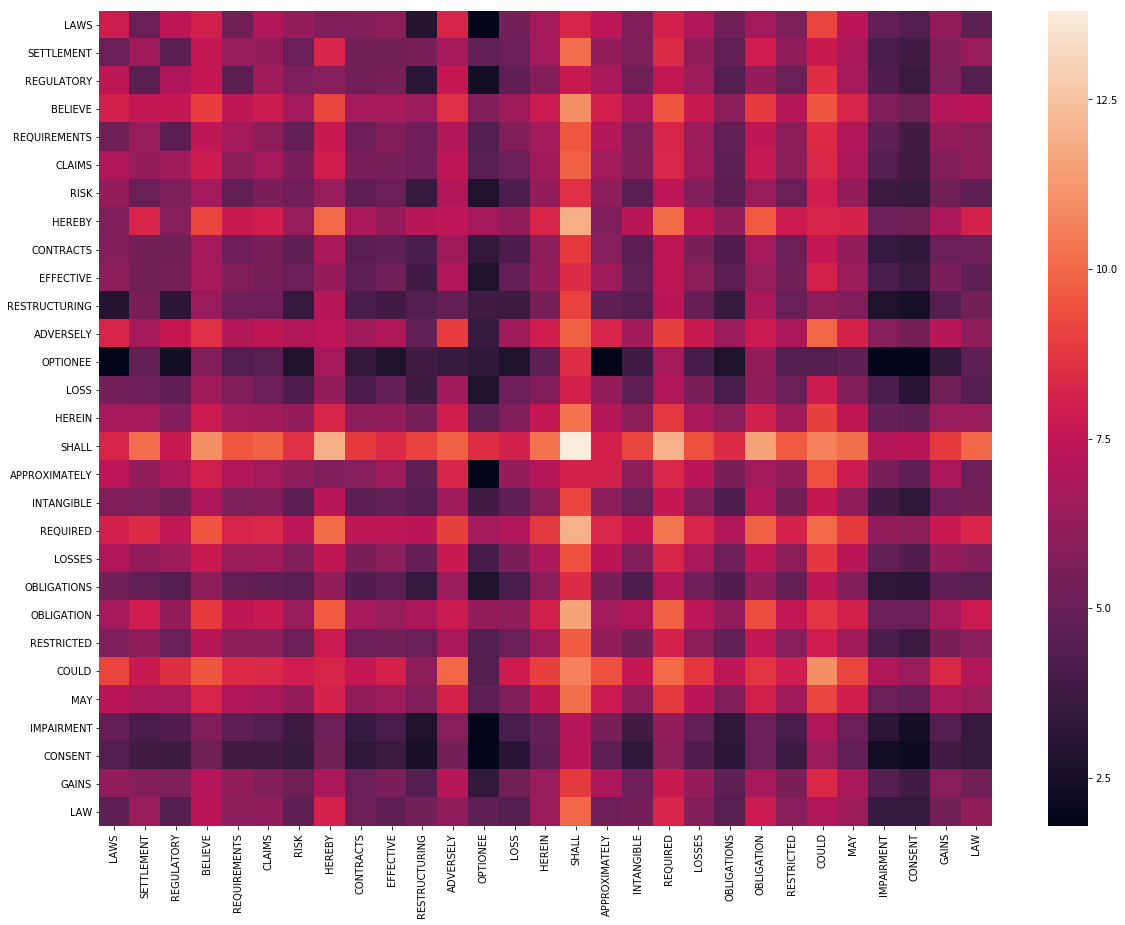

In [63]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sn.heatmap(keyword_norm)
plt.show()